In [117]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate 
from scipy import integrate

cos = np.cos
sin = np.sin
pi = np.pi

# Question 1

In [118]:
#Defining the derivative
def der(f, x, h):
    df = (8*(f(x+h) - f(x-h)) + f(x-2*h) - f(x+2*h)) / (12*h)
    return df

#Defining the function
def exp(x):
    return np.exp(0.01*x)

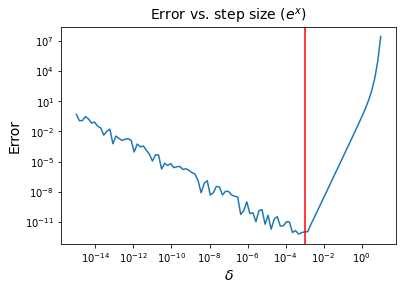

The ideal step size for $e^{x}$ is 0.0010238362555396092 with the lowest error at 0.00047863009232263805


In [119]:
#checking e^x for x=2 
h = np.logspace(-15, 1, 101)
y = der(np.exp, 2, h)
err = np.abs(np.exp(2) - y)
h1 = ((45/4)*10**(-16))**(1/5)

plt.clf()
plt.plot(h,err)
plt.xlabel("$\delta$", fontsize = 14)
plt.ylabel("Error", fontsize = 14)
plt.title("Error vs. step size ($e^{x}$)", fontsize = 14)
plt.axvline(x = h1, color='r')
plt.xscale("log")
plt.yscale("log")
plt.show()
print("The ideal step size for $e^{x}$ is", h1,
      'with the lowest error at', h[np.argmin(err)])
    

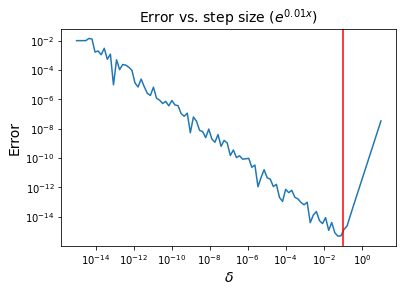

The ideal step size for $e^{0.01x}$ is 0.10238362555396095  with the lowest error at 0.054622772176843595


In [120]:
#checking e^0.01*x for x=2 
h=np.logspace(-15, 1, 100)
y=der(exp,2,h)
err=np.abs(0.01*np.exp(2*0.01)-y)
h2=((45/4)*10**(-16)*(1/(0.01**5)))**(1/5)

plt.clf()
plt.plot(h,err)
plt.xlabel("$\delta$", fontsize = 14)
plt.ylabel("Error", fontsize = 14)
plt.title("Error vs. step size ($e^{0.01x}$)", fontsize = 14)
plt.axvline(x = h2, color = 'r')
plt.xscale("log")
plt.yscale("log")
plt.show()
print("The ideal step size for $e^{0.01x}$ is", h2,
      ' with the lowest error at', h[np.argmin(err)])

# Question 2

In [121]:
# Loading the data
data = np.loadtxt('lakeshore.txt')
T = data[:,0]
V = data[:,1]

T = np.flip(T) # I figure that this must be increasing for the fit to work
V = np.flip(V) # 

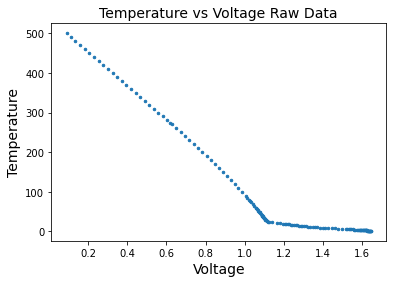

In [122]:
# Plotting the raw data
plt.clf()
plt.plot(V, T, '.', markersize = 5)
plt.xlabel('Voltage', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Temperature vs Voltage Raw Data', fontsize = 14)
plt.show()

In [123]:
# Doing Spline fitting on the data
x_fit = np.linspace(V[0], V[-1], 1001)
spln = interpolate.splrep(V, T)
y_fit = interpolate.splev(x_fit, spln)

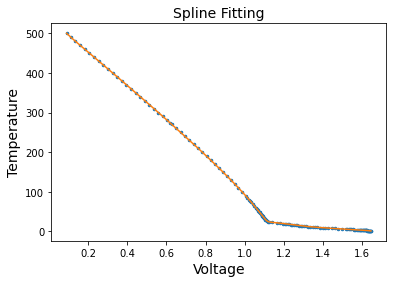

In [124]:
# Plotting the Fit with the data
plt.clf()
plt.plot(V, T, '.', label = 'Raw Data', markersize = 5)
plt.plot(x_fit, y_fit, label = 'Spline Fit')
plt.xlabel("Voltage", fontsize = 14)
plt.ylabel("Temperature", fontsize = 14)
plt.title('Spline Fitting', fontsize = 14)
plt.show()

In [125]:
# Now let find the temperature error
def findTemp(x, spln, error):
    assert x>min(V), 'input data is not in the range (too small)'
    assert x<max(V), 'input data is not in the range (too large)'
    temp = interpolate.splev(x, spln) 
    print('The temperature is', temp, ' for ', x , 'V, with an error of ', error)

In [126]:
temp_toFindError = interpolate.splev(V[0:-1:2], spln) # This is to pick out the even and interpolate it
error = np.std(T[0:-1:2] - temp_toFindError) 
temp = findTemp(1, spln, error)

The temperature is 92.8996409775585  for  1 V, with an error of  2.8370671301025026e-14


# Question 4

The function (which is found in Griffiths is:  
$E = \frac{2\pi R^2\sigma}{4\pi\epsilon_o}\int_0^\pi \frac{(z-Rcos\theta)sin\theta}{(R^2+z^2-2Rzcos \theta)^{\frac{3}{2}}}d\theta$

WLOG, for the sake of clarity, we can choose the constant and the radius $R = 1$ so that the function becomes: 
$E = \int_0^\pi \frac{(z-cos\theta)sin\theta}{(1+z^2-2zcos \theta)^{\frac{3}{2}}}d\theta$

In [127]:
# Defining the function
def Integrand(theta):
    integrand = (z - cos(theta))*sin(theta) / (1 + z**2 - 2*z*cos(theta))**(3/2)
    return integrand

In [128]:
# Defining our integrator (THIS IS COPIED FROM LECTURE)
def simple_integrate(fun,a,b,tol):
    x=np.linspace(a,b,5);
    dx=(b-a)/4.0;
    #np.median(np.diff(x))
    y=fun(x);
    neval=len(x) #let's keep track of function evaluations
    f1=(y[0]+4*y[2]+y[4])/6.0*(b-a);
    f2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/12.0*(b-a);
    myerr=np.abs(f2-f1);
    if (myerr<tol):
        #return (f2)/1.0,myerr,neval
        return (16.0*f2-f1)/15.0,myerr,neval;
    else:
        mid=0.5*(b+a);
        f_left,err_left,neval_left=simple_integrate(fun,a,mid,tol/2.0);
        f_right,err_right,neval_right=simple_integrate(fun,mid,b,tol/2.0);
        neval=neval+neval_left+neval_right;
        f=f_left+f_right;
        err=err_left+err_right;
        return f,err,neval;
    

At singularity $z=1$, the "simple_integrate" integrator will have to evaluate the Integrand at theta = 0 (y[0] = 0), which will makes the f1 and f2 returns 'nan' value. The first If statement will never be reached and the function will be thrown into an infinite loop. Python will catch this and return a recursion error. That's why in order to evaluate the this integrand, I will need to either split z into 2 different regions around the singularity or just assign 'nan' to E at the singularity.

In [129]:
# I am splitting this into 2 different regions
Z1 = np.linspace(0, 0.99, 101);
E1 = np.zeros(101);
Z2 = np.linspace(1.01, 2, 101);
E2 = np.zeros(101);
for i in range(101):
    z = Z1[i];
    E1[i] = simple_integrate(Integrand, 0, pi, 10**-5)[0];
    z = Z2[i];
    E2[i] = simple_integrate(Integrand, 0, pi, 10**-5)[0];

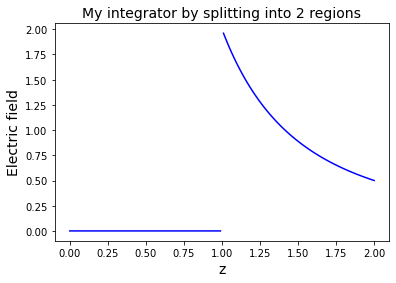

In [130]:
plt.clf()
plt.xlabel("z", fontsize=14)
plt.ylabel("Electric field", fontsize=14)
plt.title("My integrator by splitting into 2 regions", fontsize=14)
plt.plot(Z1, E1, color = 'blue')
plt.plot(Z2, E2, color = 'blue')
plt.show()

In [131]:
# I am assigning E = 'nan' when z = 1
Z = np.linspace(0, 2, 101);
E = np.zeros(101);
for i in range(101):
    z = Z[i]
    if z == 1:
        E[i] = 'nan';
    else:
        E[i] = simple_integrate(Integrand, 0, pi, 10**-5)[0]

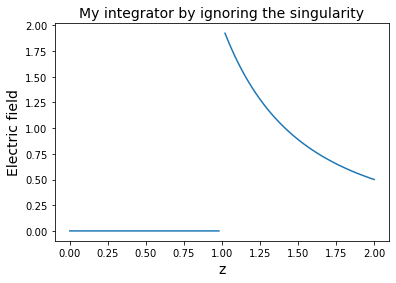

In [132]:
plt.clf()
plt.xlabel("z", fontsize=14)
plt.ylabel("Electric field", fontsize=14)
plt.title("My integrator by ignoring the singularity", fontsize=14)
plt.plot(Z, E)
plt.show()

In [133]:
# For the Quad Integrator
Z = np.linspace(0,2,101)
E = np.zeros(101)
for i in range(101):
    z=Z[i];  
    E[i]=scipy.integrate.quad(Integrand,0,np.pi)[0];

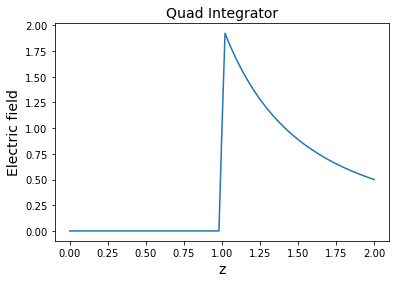

In [134]:
plt.clf()
plt.xlabel("z", fontsize=14)
plt.ylabel("Electric field", fontsize=14)
plt.title("Quad Integrator", fontsize=14)
plt.plot(Z,E)
plt.show()

Clearly the Quad doesn't care about the singularity! 

# Question 3

In [135]:
###### COSINE FUNCTION
xi = np.linspace(-pi/2, pi/2, 7)
yi = cos(xi)

In [136]:
# Define Rational Fit
def rat_eval(p,q,x):
    top=0
    for i in range(len(p)):
        top=top+p[i]*x**i
    bot=1
    for i in range(len(q)):
        bot=bot+q[i]*x**(i+1)
    return top/bot

def rat_fit(x,y,n,m):
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.inv(mat),y)
    p=pars[:n]
    q=pars[n:]
    return p,q

    ## Modified Rat Fit
def rat_fit2(x,y,n,m):
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.pinv(mat),y) # Modified part is here
    p=pars[:n]
    q=pars[n:]
    return p,q

In [137]:
# Poly Fit
x_poly = np.linspace(xi[0],xi[-1],101)
y_true = cos(x_poly)
y_poly = np.zeros(len(x_poly))
   
pars = np.polyfit(xi, yi, 7)
pred = np.polyval(pars, x_poly)
y_poly = pred

#plt.clf();
#plt.plot(xi,yi,'*', markersize = 10)
#plt.plot(x_poly, y_poly)
#plt.show()

print('my rms error for Poly is ',np.std(y_poly - y_true))

my rms error for Poly is  1.1761287400541421e-05


/Users/anvuong/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [138]:
# Cubic Spline
x_spln = np.linspace(xi[0], xi[-1], 101)
y_true = cos(x_spln)
spln = interpolate.splrep(xi, yi)
y_spln = interpolate.splev(x_spln, spln)

#plt.clf();
#plt.plot(xi,yi,'*', markersize = 10)
#plt.plot(x_spln, y_spln)
#plt.show()

print('my rms error for Cubic Spline is ', np.std(y_spln - y_true))

my rms error for Cubic Spline is  0.00045864751372040195


In [139]:
# For Rational Function Fit
n=3
m=4
# So a total of 7 data

x_rat = np.linspace(xi[0], xi[-1], n+m-1)
y_rat = cos(x_rat)
p,q = rat_fit(x_rat, y_rat,n,m)
xx = np.linspace(xi[0], xi[-1],101)
y_true = cos(xx)
pred = rat_eval(p,q,xx)

#plt.clf()
#plt.plot(x_rat, y_rat ,'*', markersize = 10)
#plt.plot(xx,y_true)
#plt.plot(xx, pred)

print('my rms error for Ratonal Function is ', np.std(pred - y_true))

my rms error for Ratonal Function is  0.0008528413928656371


The Poly fit behaves the best among all of the fit, followed by the spline and then the rational. This is due to the fact that cosine can be described very well with polynomials (in fact it's a taylor expansion of all even order terms). This leads to a higher order in cubic spline because the fit fails to address the even order expansion nature of cosine. The rational fucntion is not a good approximation for cosine.

In [140]:
##### LORENTZIAN
xi = np.linspace(-1, 1, 9)
yi = 1 / (1 + xi**2)

/Users/anvuong/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


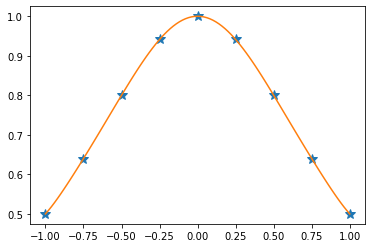

my rms error for Poly is  0.03178946931385083


In [141]:
# Poly Fit
x_poly = np.linspace(xi[0],xi[-1],101)
y_true = cos(x_poly)
y_poly = np.zeros(len(x_poly))
   
pars = np.polyfit(xi, yi, 9)
pred = np.polyval(pars, x_poly)
y_poly = pred

plt.clf();
plt.plot(xi,yi,'*', markersize = 10)
plt.plot(x_poly, y_poly)
plt.show()

print('my rms error for Poly is ',np.std(y_poly - y_true))

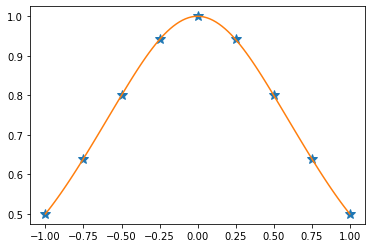

my rms error for Cubic Spline is  0.03166779092565621


In [142]:
# Cubic Spline
x_spln = np.linspace(xi[0], xi[-1], 101)
y_true = cos(x_spln)
spln = interpolate.splrep(xi, yi)
y_spln = interpolate.splev(x_spln, spln)

plt.clf();
plt.plot(xi,yi,'*', markersize = 10)
plt.plot(x_spln, y_spln)
plt.show()

print('my rms error for Cubic Spline is ', np.std(y_spln - y_true))

In [143]:
# For Rational Function Fit with low order
n=2
m=3

x_rat = np.linspace(xi[0], xi[-1], n+m-1)
y_rat = cos(x_rat)
p,q = rat_fit(x_rat, y_rat,n,m)
xx = np.linspace(xi[0], xi[-1],101)
y_true = cos(xx)
pred = rat_eval(p,q,xx)

print('my rms error for Ratonal Function with low order m & n is ', np.std(pred - y_true))
print(p)
print(q)

my rms error for Ratonal Function with low order m & n is  0.030963048783374397
[1.04255885e+00 4.44089210e-16]
[8.8817842e-16 9.2958431e-01]


my rms error for Ratonal Function with high order n & m is  9.722589617990687e-07
[ 9.99999785e-01  5.45696821e-12 -4.05932967e-01 -2.72848411e-12]
[0.         0.09405471 0.         0.0054535 ]


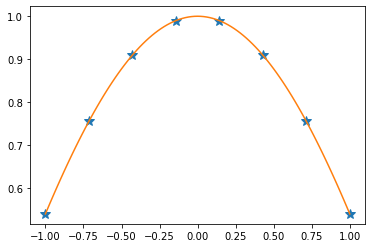

In [144]:
# For Rational Function Fit

n=4
m=5


x_rat = np.linspace(xi[0], xi[-1], n+m-1)
y_rat = cos(x_rat)
p,q = rat_fit(x_rat, y_rat,n,m)
xx = np.linspace(xi[0], xi[-1],101)
y_true = cos(xx)
pred = rat_eval(p,q,xx)

plt.clf()
plt.plot(x_rat, y_rat ,'*', markersize = 10)
#plt.plot(xx,y_true)
plt.plot(xx, pred)

print('my rms error for Ratonal Function with high order n & m is ', np.std(pred - y_true))
print(p)
print(q)

As expected, the Lorentzian is best interpolated with a rational function due to its nature of being a ratio of 2 polynomials. Cubic spline and polynomials are equally as bad when trying to interpolate data.
Low order n & m give rise to large error. High order n & m give rise to low error.

my rms error for Ratonal Function is  9.722589351897578e-07
[ 9.99999785e-01 -1.81898940e-12 -4.05932967e-01  9.09494702e-13]
[ 1.81898940e-12  9.40547080e-02 -2.27373675e-13  5.45349715e-03]


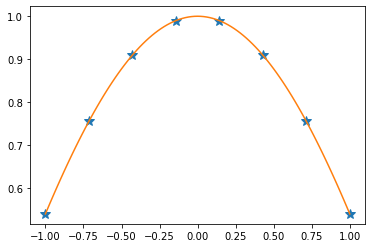

In [145]:
# For the second version of Rational Function Fit 
n=4
m=5
# So a total of 7 data

x_rat = np.linspace(xi[0], xi[-1], n+m-1)
y_rat = cos(x_rat)
p,q = rat_fit2(x_rat, y_rat,n,m)
xx = np.linspace(xi[0], xi[-1],101)
y_true = cos(xx)
pred = rat_eval(p,q,xx)

plt.clf()
plt.plot(x_rat, y_rat ,'*', markersize = 10)
#plt.plot(xx,y_true)
plt.plot(xx, pred)

print('my rms error for Ratonal Function is ', np.std(pred - y_true))
print(p)
print(q)

By changing from np.linalg.inv to np.linalg.pinv, it allows more degree of freedom for q to have more than just q1 and q3 like the previous case. The error on the np.linalg.pinv is a bit lower than np.linalg.inv, which might be the result of this change.
